In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def bias(y, z):
    return (y - z)

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [10]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 25

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [11]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 25     с шагом 0.1 на тренировочной выборке: 3574.664014367957
Ошибка алгоритма из 10 деревьев глубиной 25     с шагом 0.1 на тестовой выборке: 8683.083074129065


Построим графики зависимости ошибки на обучающей и тестовой выборках от количества деревьев в ансамбле и от максимальной глубины деревьев

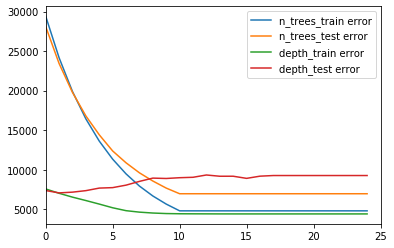

In [13]:
# plt.xlabel('Max depth')
# plt.ylabel('MSE')
n_trees = 25
max_depth = 5
train_err = []
test_err = []
    
for n in range(1,n_trees+1):
    trees, train_errors, test_errors=gb_fit(n, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
#     print (trees, train_errors, test_errors, '\n')
    train_err.append(train_errors[-1])
    test_err.append(test_errors[-1])
            
        
plt.xlim(0, 25)
plt.plot(list(range(n_trees)), train_err, label='n_trees_train error')
plt.plot(list(range(n_trees)), test_err, label='n_trees_test error')
# plt.legend(loc='upper right')
# plt.show()

n_trees = 10
max_depth = 25
train_err = []
test_err = []
for d in range(1, max_depth+1):
    trees, train_errors, test_errors=gb_fit(n_trees, d, X_train, X_test, y_train, y_test, coefs, eta)
#     print (trees, train_errors, test_errors, '\n')
    train_err.append(train_errors[-1])
    test_err.append(test_errors[-1])
            
        
plt.plot(list(range(max_depth)), train_err, label='depth_train error')
plt.plot(list(range(max_depth)), test_err, label='depth_test error')
plt.legend(loc='upper right')
plt.show()